    Nama  : Lia Anggraini      
    NIM   : 09011281722065    
    Kelas : SK5A Reguler     
    MK    : Kecerdasan Buatan 
    Dosen : Prof.Dr.Ir. Siti Nurmaini,M.T.

# Implementasi Metode Fuzzy Mamdani pada Aplikasi Inventory untuk Prediksi Pengadaan Barang di PT. Pertamina (Persero) Perkapalan_____________________________________________________________________________________________________________
PT. Pertamina (Persero) Perkapalan adalah fungsi di Pertamina yang bergerak dibidang shipping. Dimana menjalankan proses pengadaan kapal baru, sistem distribusi produk oil dan gas, dan seluruh kegiatan yang berkaitan dengan perkapalan. Dalam operasional kapal dibutuhkan infrastruktur teknologi yang paling terbaru. Hal ini di provide oleh fungsi IT(Information Technology) Shipping. Pada saat ini pengelolahan data inventarisasi yang ada di fungsi IT Shipping masih menggunakan Microsoft Excel. Pengelolaan seperti ini masih belum efisien dan menghambat kelancaran dalam pencarian data. Kemudian berdampak juga pada laporan inventarisasi yang dihasilkan menjadi tidak akurat dikarenakan keterlambatan pegawai pada saat pelaporan barang sehingga terjadi pelaporan barang tidak tepat waktu. Karena laporan yang dihasilkan tidak akurat dan tidak tepat waktu, maka proses pemesanan barang dan pendataan barang sering tidak tepat sehingga terjadi permasalahan seperti kekurangan stok barang dan penumpukan stok barang. Untuk mengatasi permasalahan pengendalian penyediaan barang tersebut dibutuhkan suatu sistem inventory untuk melakukan pengadaan suatu barang yaitu menggunakan metode logika fuzzy mamdani. Dimana metode mamdani ini digunakan untuk peramalan dan perencanaan yang berkaitan dengan proses produksi atau pengadaan barang. Untuk mendapatkan hasil produksi atau pengadaan barang dilihat dari jumlah maksimal dan minimal dari persediaan dan permintaan tiap bulannya.  Variable yang digunakan berjumlah 3 variabel yaitu 2 variabel input dan 1 variabel output. Dari 3 variabel tersebut terdiri 3 himpunan fuzzy yaitu sedikit, sedang, dan banyak.

Maka, dari latar belakang tersebut setiap keadaan dari variabel input dan output akan dijabarkan dalam linguistik sebagai berikut:

**a. Input**
- Persediaan barang
   - **Sedikit  :** 1 - 170
   - **Sedang :** 97 - 243
   - **Banyak :** 170 - ≥243 
 
- Permintaan barang
   - **Sedikit :** 1 - 12
   - **Sedang :** 4 - 20
   - **Banyak :** 12 - ≥20
 
**b. Output**
- Pembelian Barang
   - **Sedikit :** 1 - 121
   - **Sedang :** 97 - 146
   - **Banyak :** 121 - ≥146

## Metode Fuzzy Mamdani

Langkah-langkah dalam metode fuzzy mamdani, antara lain:  
1. Fuzzifikasi
2. Rule Based
3. Mekanisme Inferensi
4. Defuzzifikasi

- Import Library

Library yang akan digunakan adalah numpy, skfuzzy, dan matplotlib.pyplot. Selain itu fungsi control dari library skfuzzy juga akan digunakan.

In [123]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl


# 1. Fuzzifikasi
`Fuzzifikasi` digunakan untuk memetakan variabel input yang berupa nilai numerik (crisp) ke dalam fuzzy set, sehingga diperoleh nilai linguistik dan derajat keanggotaannya.

### 1.1. Menentukan Variabel dan Semesta Pembicaraan

Pada langkah ini, setiap variabel input dan output akan ditentukan nilai semesta pembicaraannya atau penentuan batas nilai dari masing-masing variabel. Karena setiap variabel yang akan digunakan dalam proses fuzzy akan memiliki nilai numerik, dan memiliki batas awal serta batas akhir (crisp).

- Input

In [124]:
Persediaan = ctrl.Antecedent(np.arange(50, 270, 1), 'Persediaan Barang')
Permintaan = ctrl.Antecedent(np.arange(1, 25, 1), 'Permintaan Barang')

#Untuk Plot Terpisah
Persediaan1 = np.arange(50, 270, 1)
Permintaan1 = np.arange(1, 25, 1)

- Output

In [125]:
Pembelian = ctrl.Consequent(np.arange(75, 160, 1), 'Pembelian Barang')

#Untuk Plot Terpisah
Pembelian1 = np.arange(75, 160, 1)

`Antecedent` adalah premis atau input yang akan digunakan, sedangkan `Consequent` adalah hasil dari input atau bisa disebut sebagai outputnya. Angka-angka di dalam kurung merupakan batas-batas yang formatnya adalah **batas awal, batas akhir, dan kelipatannya**, lalu batas tersebut diberi label dengan nama variabelnya.

### 1.2. Menentukan Himpunan Fuzzy
Selanjutnya, ketika sudah menentukan semesta pembicaraan atau crisp dari masing-masing variabel dalam bentuk numerik, dilanjutkan dengan membuat himpunan fuzzy yang direpresentasikan dalam variabel linguistik. Setiap variabel linguistik tersebut akan memiliki domain atau range dari minimal ke maksimal. Berikut dibentuk dalam tabel:
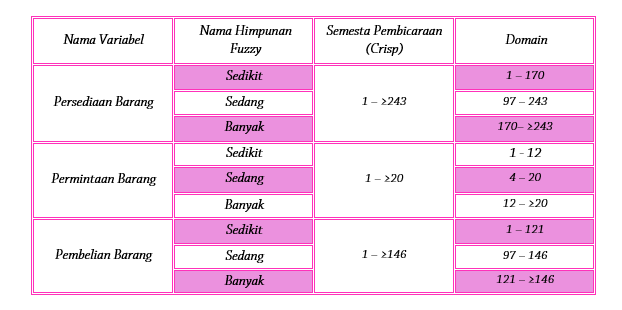
`Variabel linguistik` adalah variabel yang memiliki nilai linguistik yang berupa kata-kata dalam bahasa alamiah bukan angka.

### 1.3. Menentukan Fungsi Keanggotaan
Menentukan fungsi keanggotaan berarti mendefinisikan himpunan fuzzy dengan memetakan masukan crisp dari domainnya ke derajat keanggotaan. Seperti dicontohkan pada gambar dibawah ini:
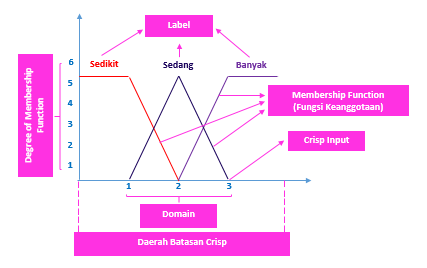

Pada fuzzy terdapat fungsi keanggotaan yang bisa direpresentasikan dalam beberapa bentuk kurva, misalnya seperti kurva trapesium dan segitiga. Berikut ini adalah bentuk persamaan dari kurva trapesium dan segitiga:

- Persamaan Kurva Trapesium
$$ \mu [x;a,b,c,d] = 
\begin{cases}
    0 & ; x \leq a \\
    \frac{(x-a)}{(b-a)} & ; a < x \leq\ b \\
    1 & ; b < x \leq\ c \\
    \frac{(d-x)}{d-c)} & ; c < x \leq\ d \\
     0 & ; x > d
\end{cases}
$$

- Persamaan Kurva Segitiga
$$ \mu [x;a,b,c] = 
\begin{cases}
    0 & ; x \leq a \\
    \frac{(x-a)}{(b-a)} & ; a < x \leq\ b \\
    \frac{(c-x)}{(c-b)} & ; b < x \leq\ c \\
     0 & ; x > c
\end{cases}
$$


Dengan menggunakan kurva segitiga dan trapesium, maka fungsi yang akan digunakan adalah `fuzz.trimf` untuk kurva segitiga, dan `fuzz.trapmf` untuk kurva trapesium. Lalu untuk mendefinisikan masing-masing domainnya, digunakan `variabel.universe`. Selanjutnya terdapat batas-batas(domain) yang formatnya adalah `[batas awal, titik puncak, batas akhir]` untuk kurva segitiga, `[batas awal, titik puncak, titik puncak, batas akhir]` untuk kurva trapesium.
Jadi perintahnya adalah:
`variabel['nama himpunan fuzzy'] = fuzz.trimf(variabel.universe, [batas awal, titik puncak, batas akhir])` untuk kurva segitiga, dan `variabel['nama himpunan fuzzy'] = fuzz.trapmf(variabel.universe, [batas awal, titik puncak, titik puncak, batas akhir])` untuk kurva trapesium.

####  a. Fungsi Keanggotaan Variabel Persediaan (Input)

In [126]:
Persediaan['Sedikit'] = fuzz.trapmf(Persediaan.universe, [1, 1, 97, 170])
Persediaan['Sedang'] = fuzz.trimf(Persediaan.universe, [97, 170, 243])
Persediaan['Banyak'] = fuzz.trapmf(Persediaan.universe, [170, 243, 243, 2700])

#Untuk plot terpisah
Persediaan1_sedikit = fuzz.trapmf(Persediaan1, [1, 1, 97, 170])
Persediaan1_sedang = fuzz.trimf(Persediaan1, [97, 170, 243])
Persediaan1_banyak = fuzz.trapmf(Persediaan1, [170, 243, 243, 2700])

#### b. Fungsi Keanggotaan Variabel Permintaan (Input)

In [127]:
Permintaan['Sedikit'] = fuzz.trapmf(Permintaan.universe, [1, 1, 4, 12])
Permintaan['Sedang'] = fuzz.trimf(Permintaan.universe, [4, 12, 20])
Permintaan['Banyak'] = fuzz.trapmf(Permintaan.universe, [12, 20, 20, 400])

#Untuk plot terpisah
Permintaan1_sedikit = fuzz.trapmf(Permintaan1, [1, 1, 4, 12])
Permintaan1_sedang = fuzz.trimf(Permintaan1, [4, 12, 20])
Permintaan1_banyak = fuzz.trapmf(Permintaan1, [12, 20, 20, 400])

#### c. Fungsi Keanggotaan Variabel Pembelian (Ouput)

In [128]:
Pembelian['Sedikit'] = fuzz.trapmf(Pembelian.universe, [1, 1, 97, 121])
Pembelian['Sedang'] = fuzz.trimf(Pembelian.universe, [97, 121, 146])
Pembelian['Banyak'] = fuzz.trapmf(Pembelian.universe, [121, 146, 146, 1500])

#Untuk plot terpisah
Pembelian1_sedikit = fuzz.trapmf(Pembelian1, [1, 1, 97, 121])
Pembelian1_sedang = fuzz.trimf(Pembelian1, [97, 121, 146])
Pembelian1_banyak = fuzz.trapmf(Pembelian1, [121, 146, 146, 1500])

### 1.4. Menampilkan Plot Masing-masing Fungsi Keanggotaan dan Nilai Linguistiknya

#### a. Variabel Persediaan (Input)
##### Plot Fungsi Keanggotaan Persediaan

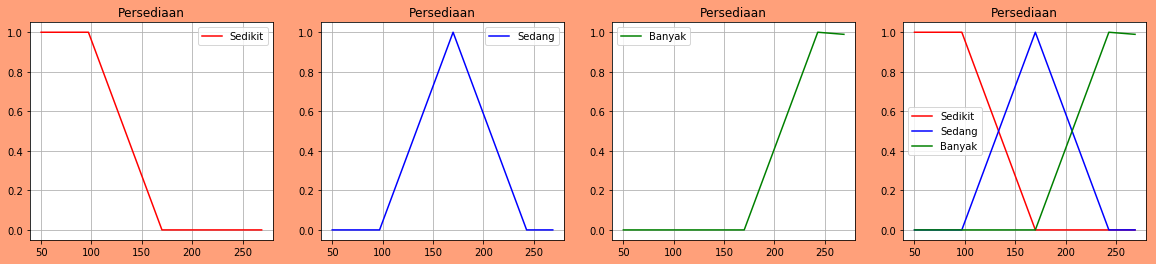

In [148]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(ncols= 4 ,facecolor='lightsalmon', figsize=(20, 4))
ax0.plot(Persediaan1,Persediaan1_sedikit, 'red', linewidth=1.5, label='Sedikit')
ax0.set_title('Persediaan')
ax0.grid()
ax0.legend()

ax1.plot(Persediaan1,Persediaan1_sedang, 'blue', linewidth=1.5, label='Sedang')
ax1.set_title('Persediaan')
ax1.grid()
ax1.legend()

ax2.plot(Persediaan1,Persediaan1_banyak, 'green', linewidth=1.5, label='Banyak')
ax2.set_title('Persediaan')
ax2.grid()
ax2.legend()

ax3.plot(Persediaan1,Persediaan1_sedikit, 'red', linewidth=1.5, label='Sedikit')
ax3.plot(Persediaan1,Persediaan1_sedang, 'blue', linewidth=1.5, label='Sedang')
ax3.plot(Persediaan1,Persediaan1_banyak, 'green', linewidth=1.5, label='Banyak')
ax3.set_title('Persediaan')
ax3.grid()
ax3.legend()

##### Nilai Linguistik Persediaan



- Persediaan Sedikit
$$ \mu Persediaan Sedikit [x] = 
\begin{cases}
    1 & ;  1 \leq  x \leq\ 97 \\
    \frac{(170-x)}{(170-97)} & ; 97 <  x \leq\ 170 \\
    0 & ; x > 170
\end{cases}
$$

- Persediaan Sedang
$$ \mu Persediaan Sedang [x] = 
\begin{cases}
    0 & ; x \leq 97 \\
    \frac{(x-97)}{(170-97)} & ; 97 < x \leq\ 170 \\
    \frac{(243-x)}{(243-170)} & ; 170 < x \leq\ 243 \\
     0 & ; x > 243
\end{cases}
$$

- Persediaan Banyak
$$ \mu Persediaan Banyak [x] = 
\begin{cases}
    0 & ; x \leq 170\\
    \frac{(x-170)}{(243-170)} & ; 170 < x \leq\ 243 \\
    1 & ; x > 243\\
\end{cases}
$$

#### b. Variabel Permintaan (Input)
##### Plot Fungsi Keanggotaan Permintaan

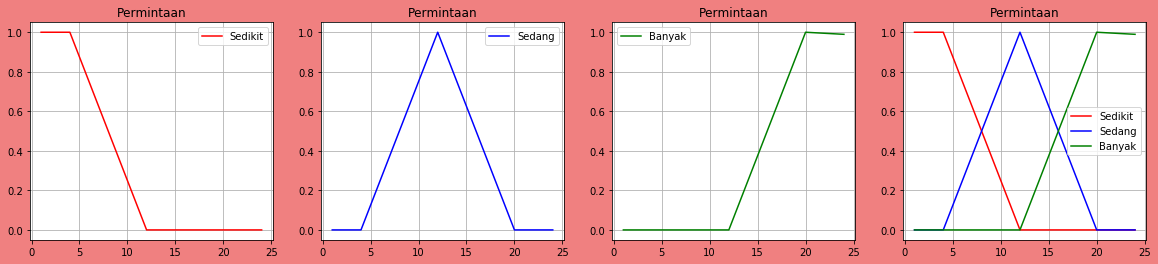

In [130]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(ncols= 4 ,facecolor='lightcoral', figsize=(20, 4))
ax0.plot(Permintaan1,Permintaan1_sedikit, 'red', linewidth=1.5, label='Sedikit')
ax0.set_title('Permintaan')
ax0.grid()
ax0.legend()

ax1.plot(Permintaan1,Permintaan1_sedang, 'blue', linewidth=1.5, label='Sedang')
ax1.set_title('Permintaan')
ax1.grid()
ax1.legend()

ax2.plot(Permintaan1,Permintaan1_banyak, 'green', linewidth=1.5, label='Banyak')
ax2.set_title('Permintaan')
ax2.grid()
ax2.legend()

ax3.plot(Permintaan1,Permintaan1_sedikit, 'red', linewidth=1.5, label='Sedikit')
ax3.plot(Permintaan1,Permintaan1_sedang, 'blue', linewidth=1.5, label='Sedang')
ax3.plot(Permintaan1,Permintaan1_banyak, 'green', linewidth=1.5, label='Banyak')
ax3.set_title('Permintaan')
ax3.grid()
ax3.legend()

##### Nilai Linguistik Permintaan


- Permintaan Sedikit
$$ \mu Permintaan Sedikit [x] = 
\begin{cases}
    1 & ;  1 \leq  x \leq\ 4 \\
    \frac{(12-x)}{(12-4)} & ; 4 <  x \leq\ 12\\
    0 & ; x > 12
\end{cases}
$$

- Permintaan Sedang
$$ \mu Permintaan Sedang [x] = 
\begin{cases}
    0 & ; x \leq 4 \\
    \frac{(x-4)}{(12-4)} & ; 4 < x \leq\ 12 \\
    \frac{(20-x)}{(20-12)} & ; 12 < x \leq\ 20 \\
     0 & ; x > 20
\end{cases}
$$

- Permintaan Banyak
$$ \mu Permintaan Banyak [x] = 
\begin{cases}
    0 & ; x \leq 12\\
    \frac{(x-12)}{(20-12)} & ; 12 < x \leq\ 20 \\
    1 & ; x > 20\\
\end{cases}
$$

#### c. Variabel Pembelian (Output)
##### Plot Fungsi Keanggotaan Pembelian

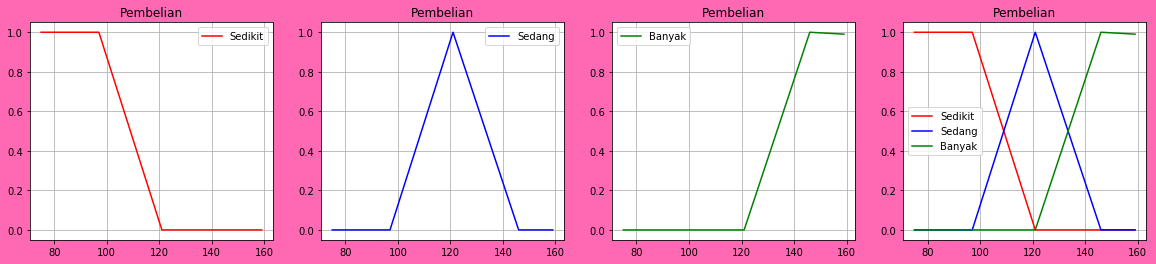

In [131]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(ncols= 4 ,facecolor='hotpink', figsize=(20, 4))
ax0.plot(Pembelian1,Pembelian1_sedikit, 'red', linewidth=1.5, label='Sedikit')
ax0.set_title('Pembelian')
ax0.grid()
ax0.legend()

ax1.plot(Pembelian1,Pembelian1_sedang, 'blue', linewidth=1.5, label='Sedang')
ax1.set_title('Pembelian')
ax1.grid()
ax1.legend()

ax2.plot(Pembelian1,Pembelian1_banyak, 'green', linewidth=1.5, label='Banyak')
ax2.set_title('Pembelian')
ax2.grid()
ax2.legend()

ax3.plot(Pembelian1,Pembelian1_sedikit, 'red', linewidth=1.5, label='Sedikit')
ax3.plot(Pembelian1,Pembelian1_sedang, 'blue', linewidth=1.5, label='Sedang')
ax3.plot(Pembelian1,Pembelian1_banyak, 'green', linewidth=1.5, label='Banyak')
ax3.set_title('Pembelian')
ax3.grid()
ax3.legend()

##### Nilai Linguistik Pembelian


-  Pembelian Sedikit
$$ \mu  Pembelian Sedikit [x] = 
\begin{cases}
    1 & ;  1 \leq  x \leq\ 97 \\
    \frac{(121-x)}{(121-97)} & ; 97 < x \leq\ 121\\
    0 & ; x > 121
\end{cases}
$$

-  Pembelian Sedang
$$ \mu  Pembelian Sedang [x] = 
\begin{cases}
    0 & ; x \leq 97 \\
    \frac{(x-97)}{(121-97)} & ; 97 < x \leq\ 121 \\
    \frac{(146-x)}{(146-121)} & ; 121 < x \leq\ 146 \\
     0 & ; x > 146
\end{cases}
$$

-  Pembelian Banyak
$$ \mu  Pembelian Banyak [x] = 
\begin{cases}
    0 & ; x \leq 121\\
    \frac{(x-121)}{(146-121)} & ; 121 < x \leq\ 146\\
    1 & ; x > 146\\
\end{cases}
$$

# 2. Rule Based
Dalam sistem logika fuzzy `rule based` digunakan untuk menyimpulkan output berdasarkan variabel inputnya.
Berdasarkan jumlah himpunan fuzzy dari variabel Persediaan yang berjumlah 3 dan himpunan fuzzy dari variabel permintaan yang berjumlah 3, maka rule yang dibuat berjumlah 3 x 3 = 9 rule.
- [R1] If Persediaan is **Sedikit** and Permintaan is **Sedikit** then Pembelian is **Sedikit**
- [R2] If Persediaan is **Sedikit** and Permintaan is **Sedang** then Pembelian is **Sedang**
- [R3] If Persediaan is **Sedikit** and Permintaan is **Banyak** then Pembelian is **Banyak**
- [R4] If Persediaan is **Sedang** and Permintaan is **Sedikit** then Pembelian is **Sedikit**
- [R5] If Persediaan is **Sedang** and Permintaan is **Sedang** then Pembelian is **Sedang**
- [R6] If Persediaan is **Sedang** and Permintaan is **Banyak** then Pembelian is **Banyak**
- [R7] If Persediaan is **Banyak** and Permintaan is **Sedikit** then Pembelian is **Sedikit**
- [R8] If Persediaan is **Banyak** and Permintaan is **Sedang** then Pembelian is **Sedang**
- [R9] If Persediaan is **Banyak** and Permintaan is **Banyak** then Pembelian is **Banyak**

### 2.1. Rule Based Table

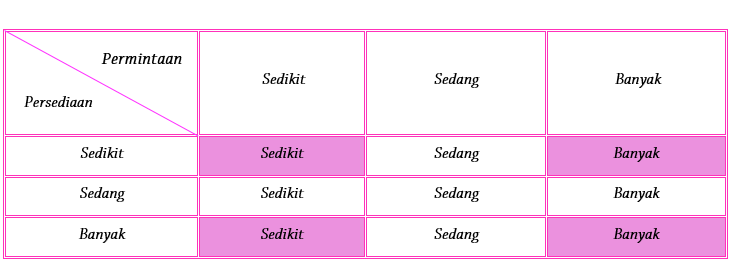

### 2.2. Fuzzy Rules

In [132]:
rule1 = ctrl.Rule(Persediaan['Sedikit'] & Permintaan['Sedikit'], Pembelian['Sedikit'])
rule2 = ctrl.Rule(Persediaan['Sedikit'] & Permintaan['Sedang'], Pembelian['Sedang'])
rule3 = ctrl.Rule(Persediaan['Sedikit'] & Permintaan['Banyak'], Pembelian['Banyak'])
rule4 = ctrl.Rule(Persediaan['Sedang'] & Permintaan['Sedikit'], Pembelian['Sedikit'])
rule5 = ctrl.Rule(Persediaan['Sedang'] & Permintaan['Sedang'], Pembelian['Sedang'])
rule6 = ctrl.Rule(Persediaan['Sedang'] & Permintaan['Banyak'], Pembelian['Banyak'])
rule7 = ctrl.Rule(Persediaan['Banyak'] & Permintaan['Sedikit'], Pembelian['Sedikit'])
rule8 = ctrl.Rule(Persediaan['Banyak'] & Permintaan['Sedang'], Pembelian['Sedang'])
rule9 = ctrl.Rule(Persediaan['Banyak'] & Permintaan['Banyak'], Pembelian['Banyak'])

### 2.3. Menampilkan Plot Fuzzy Rules

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d2caaa27b8>)

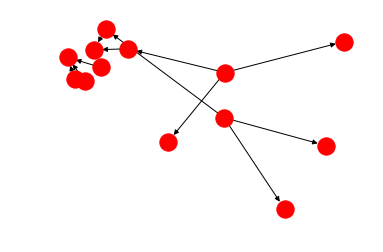

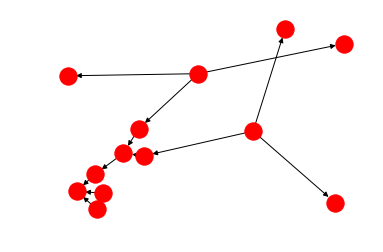

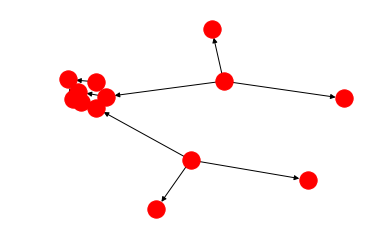

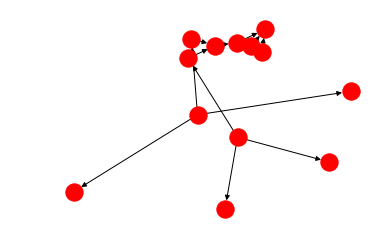

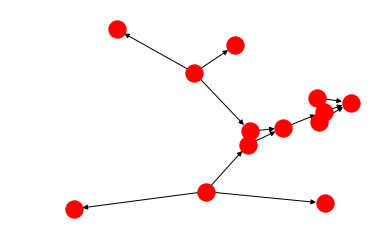

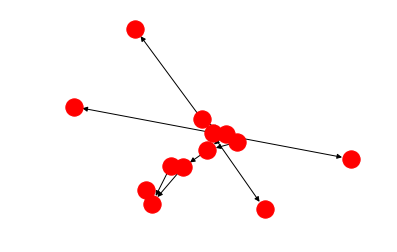

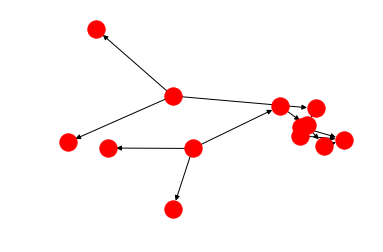

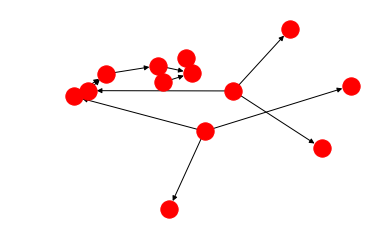

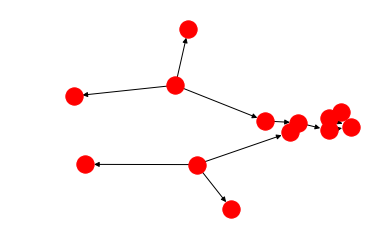

In [133]:
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()

# 3. Mekanisme Inferensi
`Mekanisme inferensi` merupakan kerangka kerja perhitungan yang mengacu pada konsep teori himpunan fuzzy, fuzzy rules, dan pemikiran fuzzy.

### 3.1. Evaluasi Rule

In [149]:
agregat_Pembelian = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

### 3.2. Agregasi
Dari evaluasi rule, dapat kita gambarkan rule aktif yang berjalan pada plot Pembelian, diantaranya:
1. [R5] pada plot Pembelian = Pembelian **Sedang** (0.75)
2. [R8] pada plot Pembelian = Pembelian **Sedang** (0.25)

### 3.3. Menggunakan Mode Simulasi

In [150]:
prediksi_Pembelian = ctrl.ControlSystemSimulation(agregat_Pembelian)

# 4. Defuzzifikasi
`Defuzzifikasi` berguna untuk mengubah output fuzzy yang didapatkan dari mekanisme inferensi menjadi crisp, dengan menggunakan fungsi keanggotaan yang sesuai dengan proses fuzzifikasi.

### 4.1. Simulasi dengan Memasukan Nilai pada Variabel Input

In [136]:
prediksi_Pembelian.input['Persediaan Barang'] = 188
prediksi_Pembelian.input['Permintaan Barang'] = 12

### 4.2. Komputasi

In [137]:
prediksi_akhir = prediksi_Pembelian.compute()
prediksi_akhir = prediksi_Pembelian.output['Pembelian Barang']
print ("Perhitungan hasil komputasi = %.3f" % prediksi_akhir)

Perhitungan hasil komputasi = 121.350


### 4.3. Menampilkan Plot Hasil Komputasi

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


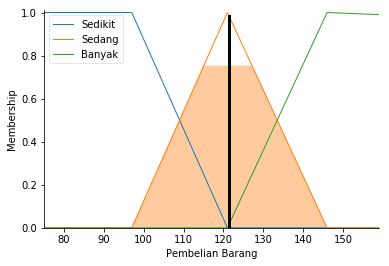

In [141]:
Pembelian.view(sim = prediksi_Pembelian)

### 4.4. Perhitungan Manual
Karena di atas sudah dilakukan proses defuzzifikasi komputasi, selanjutnya hasil dari komputasi tersebut akan dibandingkan dengan hasil perhitungan manualnya. Sebagai contoh, input untuk variabel `persediaan barang berjumlah 188`, sedangkan untuk variabel `permintaan barang berjumlah 12`. Jika dilihat pada himpunan fuzzy, nilai 188 pada variabel persediaan barang berada di himpunan fuzzy **"sedang"** dan **"banyak"**, sedangkan untuk nilai 12 pada variabel permintaan barang berada di himpunan fuzzy **"sedang"**.
Berikut ini adalah perhitungan manualnya:

#### a. Penentuan Derajat Keanggotaan 

- Persediaan = 188
$$
\mu Persediaan Sedang[188] = \frac{243-188}{243-170}
                = \frac{55}{73}
                = 0.75
$$

$$
\mu Persediaan Banyak[188] = \frac{188-170}{243-170}
                = \frac{18}{73}
                = 0.25
$$

- Permintaan = 12
$$
\mu Permintaan Sedang[12] = 1
$$

#### b. Implikasi
Selanjutnya adalah mencari fungsi **implikasi dan defuzzifikasi**. Pada metode mamdani, fungsi implikasi yang digunakan adalah MIN atau menggunakan nilai minimum. Diambil dari rule based, maka ada 2 rule yang digunakan, yaitu:

- [R5] If Persediaan is **Sedang** (0.75) and Permintaan is **Sedang** (1), then Pembelian is **Sedang** (0.75)

- [R8] If Persediaan is **Banyak** (0.25) and Permintaan is **Sedang** (1), then Pembelian is **Sedang** (0.25)

#### c. Agregasi
Dari evaluasi rule, dapat kita gambarkan rule aktif yang berjalan pada plot Pembelian, diantaranya:
1. [R5] pada plot Pembelian = Pembelian **Sedang** (0.75)
2. [R8] pada plot Pembelian = Pembelian **Sedang** (0.25)

Dengan menggunakan `metode centroid` maka nilai yang memenuhi agregasi yang terdapat di plot akan dibagi
menjadi beberapa bagian, supaya nilai luas daerah yang memenuhi agregasi tersebut bisa dicari.

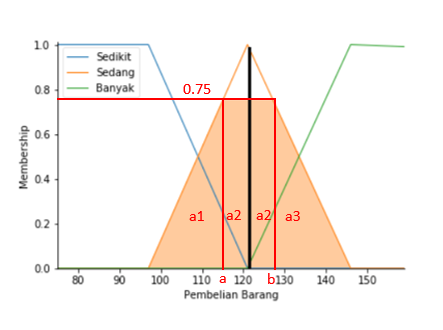

Pada gambar di atas, hasil dari agregasi sudah dibagi menjadi tiga bagian dan diberi label a1, a2, dan a3

#### d. Menentukan Nilai a dan  b

- Nilai a

$$
0.75 = \frac{a-97}{121-97}
$$
$$
0.75 \times 24 = a - 97
$$
$$
a = 18 + 97
$$
$$
a = 115
$$


- Nilai b

$$
0.75 = \frac{146-b}{146-121}
$$
$$
0.75 \times 25 = 146 - b
$$
$$
b = 146-18.75
$$
$$
b = 127.25
$$




#### e. Menghitung Nilai Tengah Daerah

- x1

$$
x_1 = 97+\frac{2}{3}\times(115-97)
    = 97+\frac{2}{3}\times(18)
    = 97+12
    =109
$$


- x2
$$
x_2 = \frac{1}{2}\times(115+127.25)
    = \frac{1}{2}\times242.25
    = 121.125
$$

- x3
$$
x_3 = 127.25+\frac{1}{3}\times(127.25-115)
    = 127.25+\frac{1}{3}\times(12.25)
    = 127.25+4.08
    = 131.33
$$

#### f. Menghitung Luas Daerah

- A1

$$
A_1 = \frac{1}{2}\times a\times t
    = \frac{1}{2}\times (115-97)\times 0.75
    = \frac{1}{2}\times 18\times 0.75
    = 6.75
$$


- A2
$$
A_2 = p\times l
    = (127.25-115)\times 0.75
    = 12.25\times 0.75
    = 9.1875
$$



- A3
$$
A_3 = \frac{1}{2}\times a\times t
    = \frac{1}{2}\times (146-127.25)\times 0.75
    = \frac{1}{2}\times 18.75\times 0.75
    = 7.03
$$

#### g. Perhitungan Defuzzifikasi
Setelah menentukan nilai tengah daerah (x) dan luas daerah (A) dari masing masing bangun datar yang memenuhi agregasi, selanjutnya akan dilakukan proses defuzzifikasi dengan metode centroid.

$$
   Hasil =\frac{\Sigma_{i}^{n} (xi\times Ai)}{\Sigma_{i}^{n} Ai}
$$

$$
  Hasil = \frac{(x_1\times A_1)+(x_2\times A_2)+(x_3\times A_3)}{A_1+A_2+A_3}
$$

$$
  Hasil = \frac{(109\times 6.75)+(121.125\times 9.1875)+(131.33\times 7.03)}{6.75+9.1875+7.03}
$$

$$
  Hasil = \frac{(735.75)+(1112.84)+(923.25)}{22.9675}
$$

$$
  Hasil = \frac{2771.84}{22.9675}
$$

$$
   Hasil = 120.68531621
$$

### 4.5. Analisa

- Jumlah Pembelian yang didapatkan dalam perhitungan python sebesar 121.350, sedangkan jumlah Pembelian yang didapatkan oleh perhitungan manual sebesar 120.68531621.  
- Selisih antara perhitungan manual dengan perhitungan oleh python sebesar 0.66468379.  